# The baseline model
## Structure

The model looks like this:
![hackathon_model.png](images/hackathon_model.png)

**How do I run this experiment?**

```
# Make sure your PYTHONPATH is set correctly to the root

export PYTHONPATH=/path/to/project:$PYTHONPATH

python3 experiment.py
```

**How do I evaluate the model?**

```
python3 evaluation.py
```


In [25]:
import pandas
import matplotlib.pyplot as plt
import os
root = os.getcwd()

## Training

We trained for 50 epochs and selected the best model according to our validation loss:

In [26]:
training_df = pandas.read_csv(os.path.join(root, "output", "training.log"))
training_df

,epoch,acc,loss,val_acc,val_loss
0,1,0.824040,0.389188,0.848587,0.340161
1,2,0.855971,0.328921,0.859243,0.321547
2,3,0.866592,0.307482,0.865202,0.314402
3,4,0.872841,0.295503,0.867582,0.306751
4,5,0.877335,0.286004,0.873352,0.301332
5,6,0.882165,0.275457,0.875353,0.292494
6,7,0.885030,0.268757,0.875753,0.288472
7,8,0.887417,0.265404,0.876806,0.287720
8,9,0.890541,0.257481,0.880281,0.285505
9,10,0.891198,0.255155,0.879712,0.284194


### Training accuracy

<Figure size 432x288 with 0 Axes>

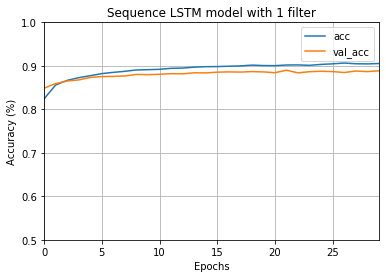

In [27]:
training_acc_columns = [x for x in list(training_df.columns) if "acc" in x]
plt.figure()
training_df[training_acc_columns].plot()
plt.grid(True)
plt.title("Sequence LSTM model with 1 filter")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")

plt.ylim([0.5,1.0])

plt.show()

### Training loss

<Figure size 432x288 with 0 Axes>

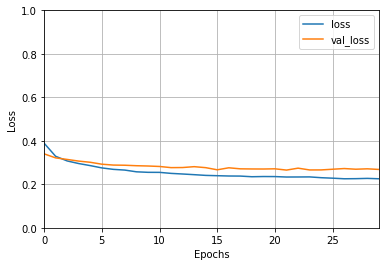

In [28]:
training_loss_columns = [x for x in list(training_df.columns) if "loss" in x]
plt.figure()
training_df[training_loss_columns].plot()
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.ylim([0.0,1.0])

plt.show()

## Evaluation

In [29]:
with open(os.path.join(root, "output", "eval.json")) as fp:
    df = pandas.read_json(fp).T

Each point in the boxplot is the accuracy for one subject

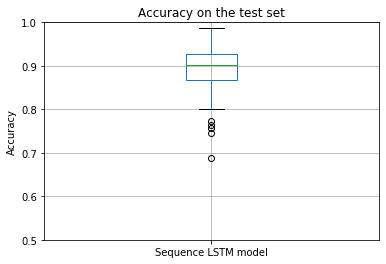

In [30]:
plt.figure()
df[["acc"]].boxplot()
plt.ylim([0.5,1])
plt.ylabel("Accuracy")
plt.title("Accuracy on the test set")
plt.xticks(plt.xticks()[0], ["Sequence LSTM model"])
plt.show()